<b> A notebook for the classification of the MNIST fashion dataset.

I used Sequential Convolutional Neural Networks (CNN) model using Keras and tensorflow as a backend.

I re-Run the model **10 times** for taking averages. 



Result : |Training Accuracy | Dev(Validation) Accuracy| Testing Accuracy |
---------------------------------------------------------------------|
         | 93.196 %          | 91.864 %               | 92.159 %          |


In [1]:
import time
import numpy as np
import pandas as pd
import datetime
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import keras
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense,Dropout, Activation, Flatten
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils
from keras import backend as K
import tensorflow as tf

Using TensorFlow backend.


In [3]:
keras.backend.image_dim_ordering()

'tf'

In [4]:
batch_size     = 64
nb_classes     = 10
nb_ephochs     = 50
img_rows, img_cols = 28,28
nb_filters     = 32
pool_size      = 2
kernel_size    = 3

In [5]:
if K.image_dim_ordering() == 'th':
    input_shape = (1,img_rows, img_cols)
else:
    input_shape = (img_rows,img_cols,1)

In [6]:
import pandas as pd
data_train = pd.read_csv('input_data/fashion-mnist_train.csv')
data_test = pd.read_csv('input_data/fashion-mnist_test.csv')

In [7]:
data_train.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
data_test.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,9,8,...,103,87,56,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,34,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,14,53,99,...,0,0,0,0,63,53,31,0,0,0
3,2,0,0,0,0,0,0,0,0,0,...,137,126,140,0,133,224,222,56,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [9]:
clothes = {0: 'T-shirt/top',
           1: 'Trouser',
           2: 'Pullover',
           3: 'Dress',
           4: 'Coat',
           5: 'Sandal',
           6: 'Shirt',
           7: 'Sneaker',
           8: 'Bag',
           9: 'Ankle boot'}

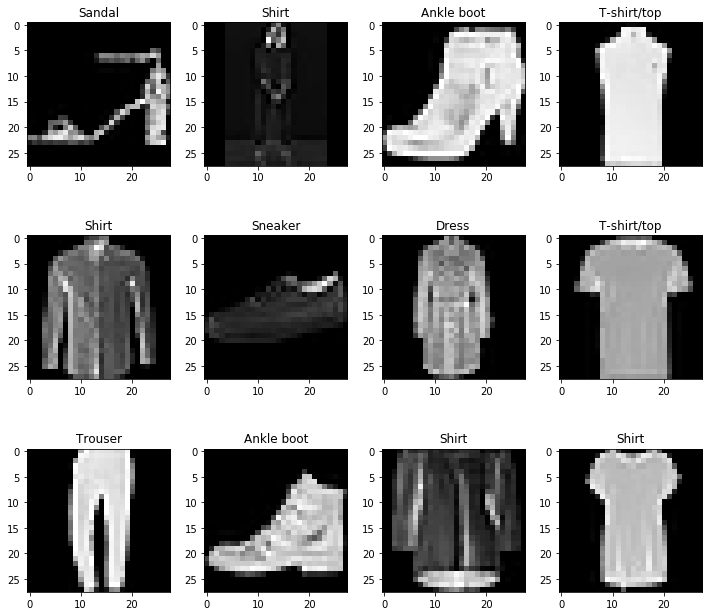

In [10]:
fig, axes = plt.subplots(3, 4,figsize=(10,10))
for row in axes:
    for axe in row:
        index = np.random.randint(10000)
        img = data_train.iloc[index, 1:].values.reshape((28, 28))
        obj = data_train.iloc[index, 0]
        axe.imshow(img, cmap='gray')
        axe.set_title(clothes[obj])
        plt.tight_layout()

In [11]:
X = data_train.iloc[:,1:].values
y = data_train.iloc[:,0].values
y = to_categorical(y)

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=101)

In [14]:
X_test = data_test.iloc[:,1:].values
y_test = data_test.iloc[:,0]
y_test  = to_categorical(y_test)

# Reshaping Data +  Normalization 

In [15]:
print(X_train.shape)
print(X_val.shape)
print(X_test.shape)

(48000, 784)
(12000, 784)
(10000, 784)


In [16]:
X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 1)
X_val = X_val.reshape(X_val.shape[0], img_rows, img_cols, 1)
X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 1)


X_train = X_train.astype('float32')
X_val = X_val.astype('float32')
X_test = X_test.astype('float32')

X_train = X_train  / 255
X_val   = X_val   / 255
X_test  = X_test / 255

In [17]:
print(X_train.shape)
print(X_val.shape)
print(X_test.shape)

(48000, 28, 28, 1)
(12000, 28, 28, 1)
(10000, 28, 28, 1)


In [18]:
X_train.max(),X_val.max(), X_test.max()

(1.0, 1.0, 1.0)

In [19]:
X_train.min(),X_val.min(), X_test.min()

(0.0, 0.0, 0.0)

# Model Architecture

## Now we need to follow the following steps:
    
    1. Convolution 
    2. Max Pooling
    3. Convolution
    4. Max pooling
    5. Dropout
    6  Flattening
    7. Full Connection (Dense)
    8. Dropout
    9. Full Connection


In [20]:
def model_architecture(nb_filters,kernel_size,input_shape):
    
    model = Sequential()
    model.add(Convolution2D(filters= nb_filters,kernel_size=(kernel_size,kernel_size),input_shape = input_shape,activation='relu'))
    model.add(MaxPooling2D(pool_size=(pool_size,pool_size)))

    model.add(Convolution2D(filters=nb_filters, kernel_size=(kernel_size,kernel_size),activation='relu'))
    model.add(MaxPooling2D(pool_size=(pool_size,pool_size)))

    model.add(Dropout(0.25))
    model.add(Flatten())

    model.add(Dense(output_dim = 128 , activation="relu"))
    model.add(Dropout(0.5))
    model.add(Dense(output_dim = nb_classes, activation='softmax'))
    model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
    return model
#model.compile(loss = keras.losses.categorical_crossentropy, optimizer= keras.optimizers.adam(), metrics = ['accuracy'])

In [21]:
model = model_architecture(nb_filters,kernel_size,input_shape)
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 11, 11, 32)        9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 5, 5, 32)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 800)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               102528    
__________

C:\Users\agebresi\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=128)`
  del sys.path[0]
C:\Users\agebresi\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="softmax", units=10)`
  from ipykernel import kernelapp as app


In [22]:
training_time    = {}
training_history = {}
testing_history  = {}

tranining_acc   = 0.0
validation_acc  = 0.0
testing_acc     = 0.0
for i in range(1,11):
    print('########    Run ' + str(i) + '    ######## \n')
    
    start_time = time.time()
    if (i == 1):
        verbose = 1
    else:
        verbose = 0
    model = model_architecture(nb_filters,kernel_size,input_shape)
    training_history['run_' + str(i)] = model.fit(X_train,y_train,batch_size= batch_size, epochs = nb_ephochs, verbose=verbose, validation_data=(X_val, y_val))
    training_time['run_' + str(i)] = time.time() - start_time
    tranining_acc  =  tranining_acc  + training_history['run_' + str(i)].history['acc'][-1]
    validation_acc =  validation_acc + training_history['run_'  + str(i)].history['val_acc'][-1]
    
    score = model.evaluate(X_test, y_test, verbose=verbose)
    testing_history['loss run_' + str(i)] = score[0]
    testing_history['acc run_'  + str(i)] = score[1]*100
    testing_acc = testing_acc + score[1]
    
    model.save('model_run' + str(i) + '.h5')
    

########    Run 1    ######## 



C:\Users\agebresi\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=128)`
  del sys.path[0]
C:\Users\agebresi\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="softmax", units=10)`
  from ipykernel import kernelapp as app


Train on 48000 samples, validate on 12000 samples
Epoch 1/50
48000/48000 [==============================] - 28s - loss: 0.6667 - acc: 0.7591 - val_loss: 0.4146 - val_acc: 0.8460
Epoch 2/50
48000/48000 [==============================] - 28s - loss: 0.4517 - acc: 0.8351 - val_loss: 0.3557 - val_acc: 0.8742
Epoch 3/50
48000/48000 [==============================] - 27s - loss: 0.4002 - acc: 0.8554 - val_loss: 0.3229 - val_acc: 0.8848
Epoch 4/50
48000/48000 [==============================] - 27s - loss: 0.3706 - acc: 0.8650 - val_loss: 0.3042 - val_acc: 0.8915
Epoch 5/50
48000/48000 [==============================] - 27s - loss: 0.3475 - acc: 0.8736 - val_loss: 0.3012 - val_acc: 0.8898
Epoch 6/50
48000/48000 [==============================] - 28s - loss: 0.3313 - acc: 0.8795 - val_loss: 0.2893 - val_acc: 0.8912
Epoch 7/50
48000/48000 [==============================] - 27s - loss: 0.3195 - acc: 0.8827 - val_loss: 0.2807 - val_acc: 0.8966
Epoch 8/50
48000/48000 [==============================

In [23]:
cols_train_acc = []
cols_val_acc   = []
cols_test_acc  = []
accuracy_cols  = []

for i in range(1,11):
    col_train =  'training_acc_' + 'run_' + str(i) 
    cols_train_acc.append(col_train)
    
    col_val = 'val_acc_' + 'run_' + str(i)  
    cols_val_acc.append(col_val)
    
accuracy_cols  = cols_train_acc + cols_val_acc 

In [24]:
train_val_acc = pd.DataFrame(columns=accuracy_cols)

for i in range(1,11):
    train_val_acc['training_acc_' + 'run_' + str(i)]  = training_history['run_' + str(i)].history['acc'] 
    train_val_acc['val_acc_'      + 'run_' + str(i)]  = training_history['run_' + str(i)].history['val_acc']
train_val_acc = train_val_acc.applymap(lambda x:  x * 100).applymap(lambda x: '%.2f' % x)
train_val_acc = train_val_acc.applymap(lambda x: pd.to_numeric(x))
train_val_acc.head()

,training_acc_run_1,training_acc_run_2,training_acc_run_3,training_acc_run_4,training_acc_run_5,training_acc_run_6,training_acc_run_7,training_acc_run_8,training_acc_run_9,training_acc_run_10,val_acc_run_1,val_acc_run_2,val_acc_run_3,val_acc_run_4,val_acc_run_5,val_acc_run_6,val_acc_run_7,val_acc_run_8,val_acc_run_9,val_acc_run_10
0,75.91,74.54,74.28,74.40,75.65,74.65,74.97,74.16,74.25,75.46,84.60,84.48,84.98,84.40,85.19,84.87,84.28,83.91,83.53,84.53
1,83.51,82.93,83.26,82.80,83.95,82.68,83.25,82.69,82.67,83.36,87.42,86.47,87.01,86.93,87.71,86.09,86.92,86.36,86.22,86.72
2,85.54,84.93,85.14,84.75,85.67,85.00,85.33,84.95,85.00,85.31,88.48,87.74,87.82,87.58,88.44,88.53,87.87,87.78,88.09,87.87
3,86.50,86.13,86.35,85.99,86.98,86.36,86.79,86.38,86.26,86.39,89.15,88.85,88.85,88.61,88.90,88.89,89.08,88.86,88.77,88.76
4,87.36,87.02,87.27,86.90,87.67,87.23,87.82,86.93,87.05,87.21,88.98,89.18,89.03,88.44,88.92,89.40,89.65,89.30,89.22,88.93


In [25]:

model_final_acc = pd.DataFrame(columns=['Training Accuracy', 'Validation Accuracy', 'Testing Accuracy'],index=[i for i in range(1,11)])

model_final_acc['Training Accuracy']   = train_val_acc.iloc[49:,:10].T.values
model_final_acc['Validation Accuracy'] = train_val_acc.iloc[49:,10:].T.values

y_test = []
for i in range(1,11):
    test = testing_history['acc run_'  + str(i)]
    y_test.append(test)
model_final_acc['Testing Accuracy']    = y_test
model_final_acc

,Training Accuracy,Validation Accuracy,Testing Accuracy
1,93.35,91.83,92.31
2,93.01,92.12,92.45
3,93.22,91.64,91.77
4,92.89,91.43,91.92
5,93.33,92.13,92.08
6,92.92,91.76,92.26
7,93.31,92.04,92.13
8,93.19,92.03,92.17
9,93.41,91.77,92.36
10,93.33,91.89,92.14


In [26]:
t = 0.0
for i in range(1,11):
    t = t + training_time['run_' + str(i)]
avg_time = t/10
avg_time = avg_time / 60
print('Average time {} mints'.format(avg_time))

Average time 21.796345467964805 mints


In [32]:
model_final_acc

,Training Accuracy,Validation Accuracy,Testing Accuracy
1,93.35,91.83,92.31
2,93.01,92.12,92.45
3,93.22,91.64,91.77
4,92.89,91.43,91.92
5,93.33,92.13,92.08
6,92.92,91.76,92.26
7,93.31,92.04,92.13
8,93.19,92.03,92.17
9,93.41,91.77,92.36
10,93.33,91.89,92.14


In [39]:
model_final_acc.to_csv('Final_Accuracy.csv')
train_val_acc.to_csv('Training_Validation_accuracies_each_run.csv')

# Loss

In [36]:
cols_train_loss = []
cols_val_loss   = []
loss_cols  = []

for i in range(1,11):
    col_train =  'training_loss_' + 'run_' + str(i) 
    cols_train_loss.append(col_train)
    
    col_val = 'val_loss_' + 'run_' + str(i)  
    cols_val_loss.append(col_val)
    
loss_cols  = cols_train_loss + cols_val_loss

In [37]:
train_val_loss = pd.DataFrame(columns=loss_cols)

for i in range(1,11):
    train_val_loss['training_loss_' + 'run_' + str(i)]  = training_history['run_' + str(i)].history['loss'] 
    train_val_loss['val_loss_'      + 'run_' + str(i)]  = training_history['run_' + str(i)].history['val_loss']
train_val_loss = train_val_loss.applymap(lambda x: '%.2f' % x)
train_val_loss = train_val_loss.applymap(lambda x: pd.to_numeric(x))
train_val_loss.head()

,training_loss_run_1,training_loss_run_2,training_loss_run_3,training_loss_run_4,training_loss_run_5,training_loss_run_6,training_loss_run_7,training_loss_run_8,training_loss_run_9,training_loss_run_10,val_loss_run_1,val_loss_run_2,val_loss_run_3,val_loss_run_4,val_loss_run_5,val_loss_run_6,val_loss_run_7,val_loss_run_8,val_loss_run_9,val_loss_run_10
0,0.67,0.69,0.70,0.70,0.67,0.70,0.68,0.71,0.71,0.67,0.41,0.44,0.41,0.44,0.41,0.42,0.44,0.45,0.44,0.42
1,0.45,0.47,0.46,0.47,0.45,0.47,0.46,0.47,0.48,0.46,0.36,0.37,0.35,0.36,0.34,0.38,0.37,0.37,0.38,0.37
2,0.40,0.42,0.41,0.42,0.40,0.41,0.40,0.41,0.42,0.40,0.32,0.34,0.33,0.34,0.32,0.32,0.33,0.33,0.33,0.34
3,0.37,0.38,0.37,0.38,0.36,0.38,0.37,0.38,0.38,0.37,0.30,0.31,0.31,0.32,0.30,0.31,0.30,0.31,0.32,0.31
4,0.35,0.36,0.35,0.36,0.34,0.35,0.34,0.35,0.36,0.35,0.30,0.30,0.30,0.31,0.29,0.29,0.28,0.29,0.29,0.30


In [38]:
train_val_loss.to_csv('Training_Validation_losses_each_run.csv')

# Plots

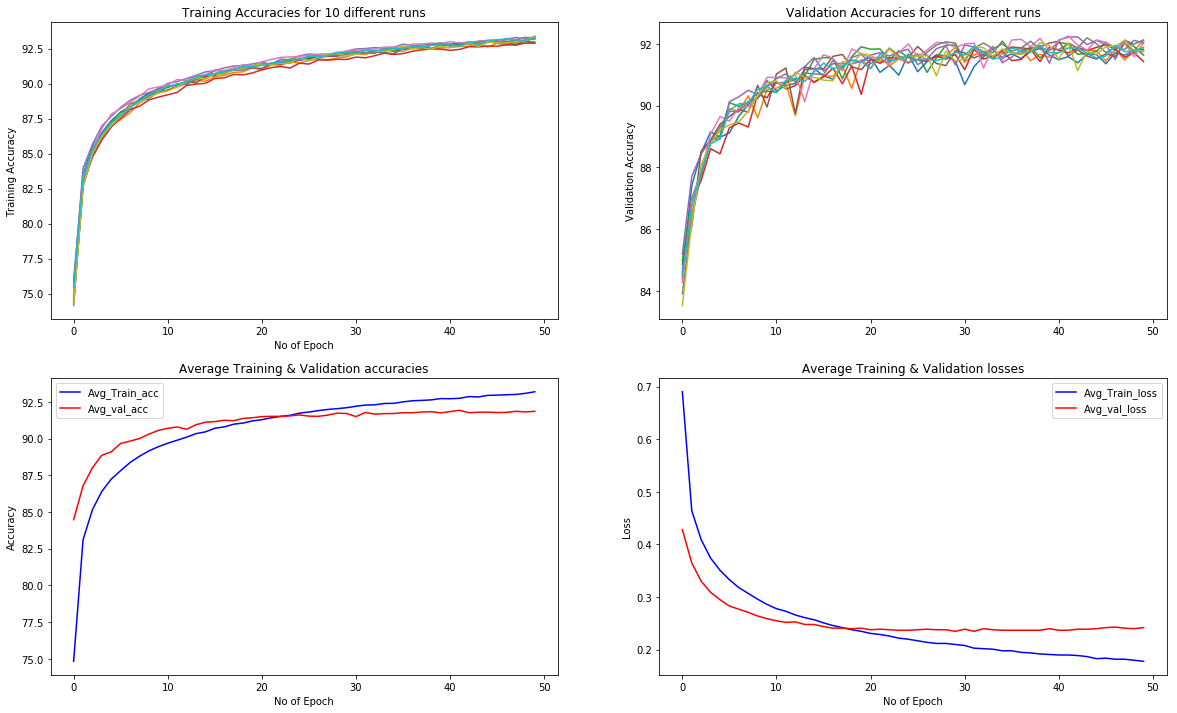

In [44]:
fig, axes = plt.subplots(nrows=2, ncols=2,figsize=(20,12))

axes[0,0].plot(train_val_acc.iloc[:,:10])
axes[0,0].set_xlabel('No of Epoch')
axes[0,0].set_ylabel('Training Accuracy')
axes[0,0].set_title('Training Accuracies for 10 different runs')

axes[0,1].plot(train_val_acc.iloc[:,10:])
axes[0,1].set_ylabel('Validation Accuracy')
axes[0,1].set_title('Validation Accuracies for 10 different runs')

axes[1,0].plot(train_val_acc.iloc[:,:10].mean(axis = 1),'b')
axes[1,0].plot(train_val_acc.iloc[:,10:].mean(axis = 1),'r')
axes[1,0].legend(['Avg_Train_acc', 'Avg_val_acc'])
axes[1,0].set_xlabel('No of Epoch')
axes[1,0].set_ylabel('Accuracy')
axes[1,0].set_title('Average Training & Validation accuracies')

axes[1,1].plot(train_val_loss.iloc[:,:10].mean(axis=1),'b')
axes[1,1].plot(train_val_loss.iloc[:,10:].mean(axis = 1),'r')
axes[1,1].legend(['Avg_Train_loss', 'Avg_val_loss'])
axes[1,1].set_xlabel('No of Epoch')
axes[1,1].set_ylabel('Loss')
axes[1,1].set_title('Average Training & Validation losses')


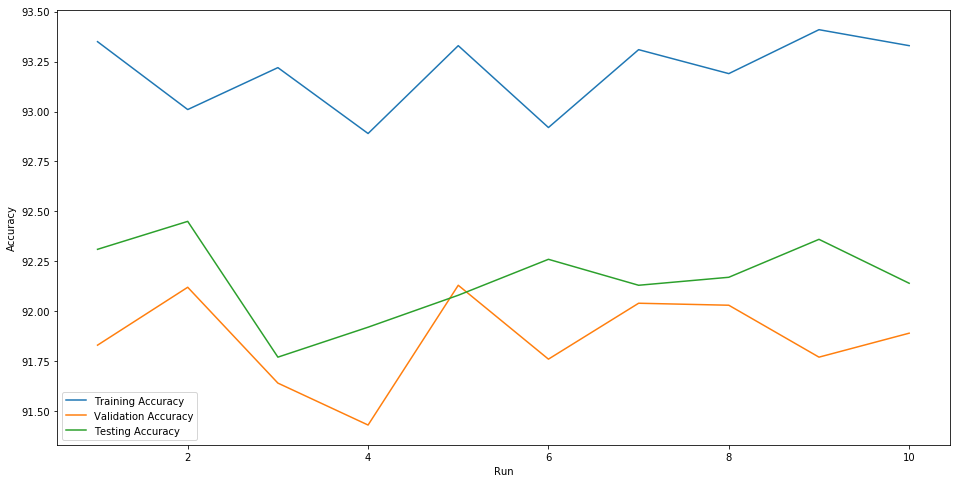

In [41]:
plt.figure(figsize=(16,8))
plt.plot(model_final_acc)
plt.xlabel('Run')
plt.ylabel('Accuracy')
plt.legend(model_final_acc.columns)

# Final Result: Average Model Accuracy

In [42]:
Avg_tranining_acc, Avg_validation_acc, Avg_testing_acc  = model_final_acc.mean()

print('Avg_tranining_acc {0:.3f} %'.format(Avg_tranining_acc))
print('Avg_validation_acc {0:.3f} %'.format(Avg_validation_acc))
print('Avg_testing_acc {0:.3f} %'.format(Avg_testing_acc))


Avg_tranining_acc 93.196 %
Avg_validation_acc 91.864 %
Avg_testing_acc 92.159 %
